In [1]:
import csv
from math import sqrt
from prettytable import PrettyTable
import matplotlib.pyplot as plot
from collections import defaultdict, Counter
import operator

#######################################

path = input("Podaj ścieżkę do pliku TENINGOWEGO CSV:")
file = open(path)
reader = csv.reader(file)

header = next(reader)	# pierwszy rekord pliku uznaję za nagłówek do tabeli
types = next(reader)	# drugi rekord będzie opisywał typ każdej kolumny

def column_type(t,value):
	if t == 'float':
		return float(value)
	elif t == 'int':
		return float(value)
	elif t == 'string':
		return value
	elif t == 'flowerSpecies':
		switch = {'0':"setosa", '1':"versicolor", '2':"virginica"}
		return switch[value]
	else:
		return value 

def csv2matrix(reader):
	data = []
	for row in reader:
		tmp = []
		for index,val in enumerate(row):
			tmp.append(column_type(types[index],val))
		
		data.append(tmp)
	return data

def column2array(matrix, n):
	return [row[n] for row in matrix]

trainingData = csv2matrix(reader)
file.close()

path = input("Podaj ścieżkę do pliku TESTOWEGO CSV:")
file = open(path)
reader = csv.reader(file)

testData = csv2matrix(reader)

#print(treningData)

#print(euklideanDistance(trainingData[2], trainingData[4], [1, 2, 3]))

Podaj ścieżkę do pliku TENINGOWEGO CSV:data_train.csv
Podaj ścieżkę do pliku TESTOWEGO CSV:data_test.csv


[95.55555555555556, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777]


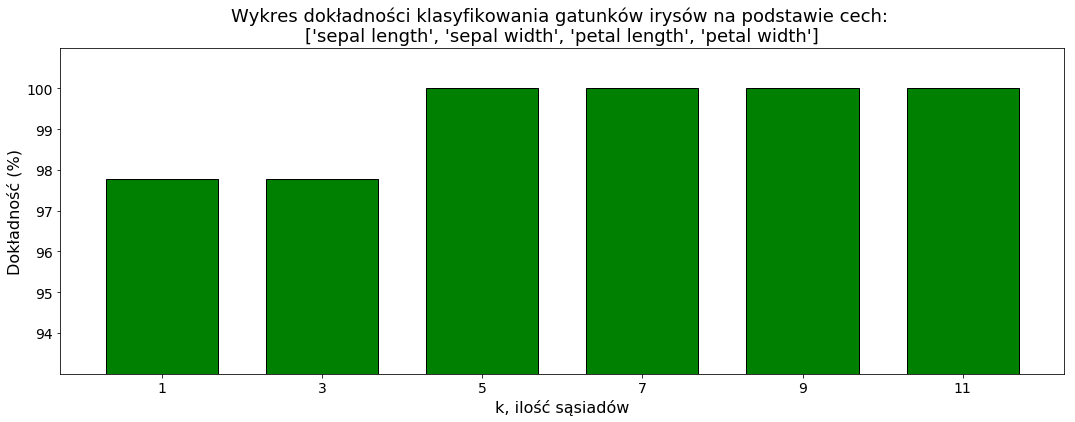

[93.33333333333333, 91.11111111111111, 95.55555555555556, 97.77777777777777, 100.0, 100.0]


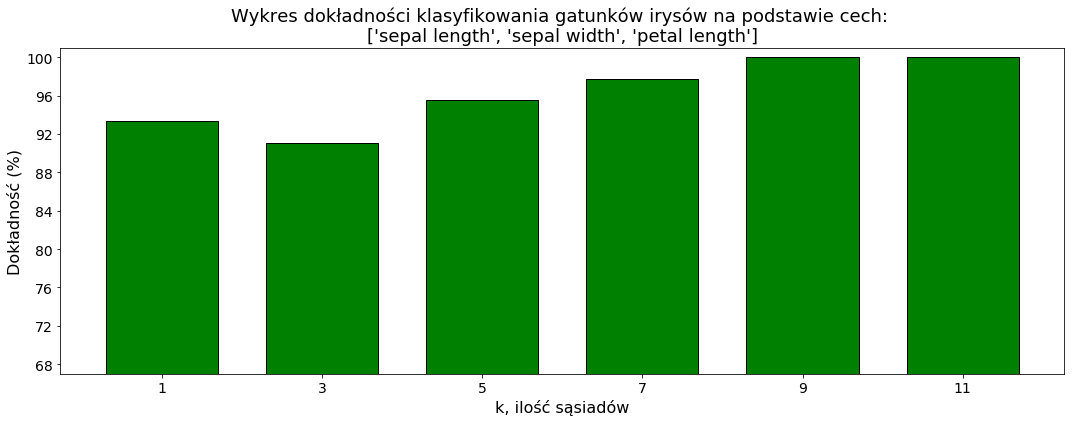

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


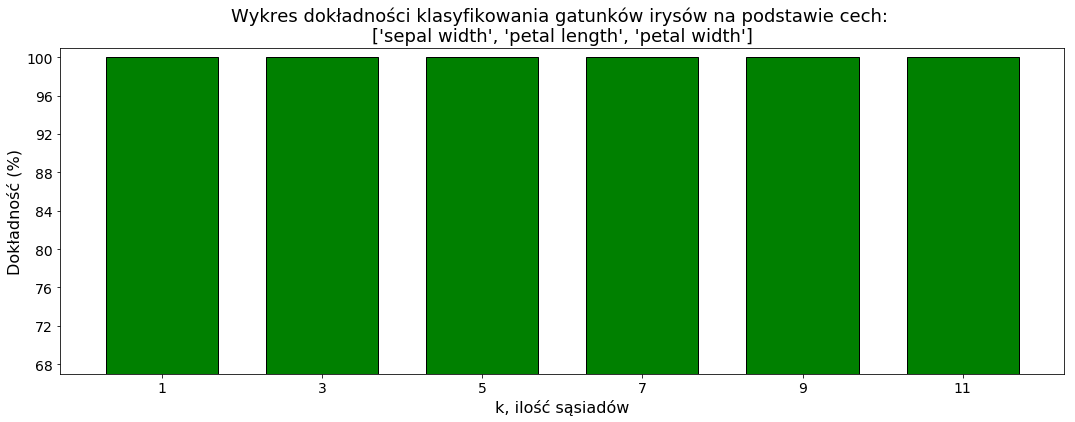

[71.11111111111111, 75.55555555555556, 80.0, 77.77777777777779, 73.33333333333333, 73.33333333333333]


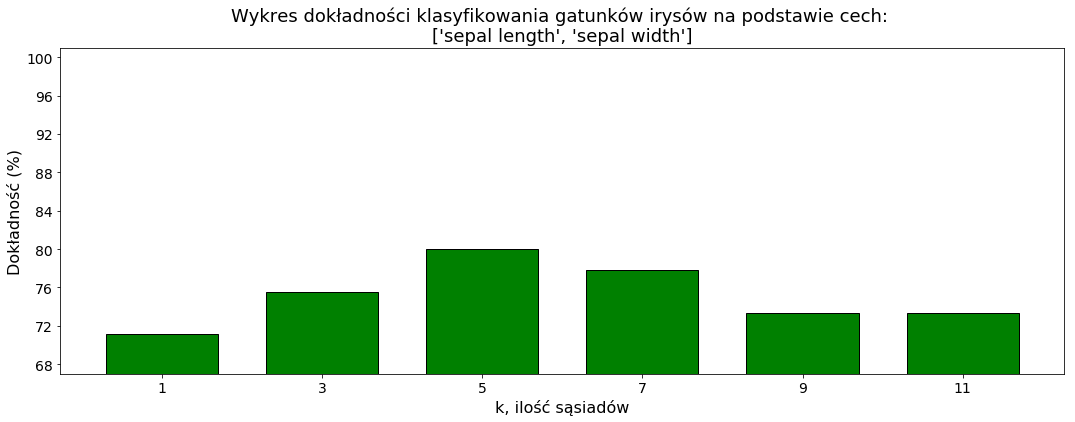

[95.55555555555556, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777, 97.77777777777777]


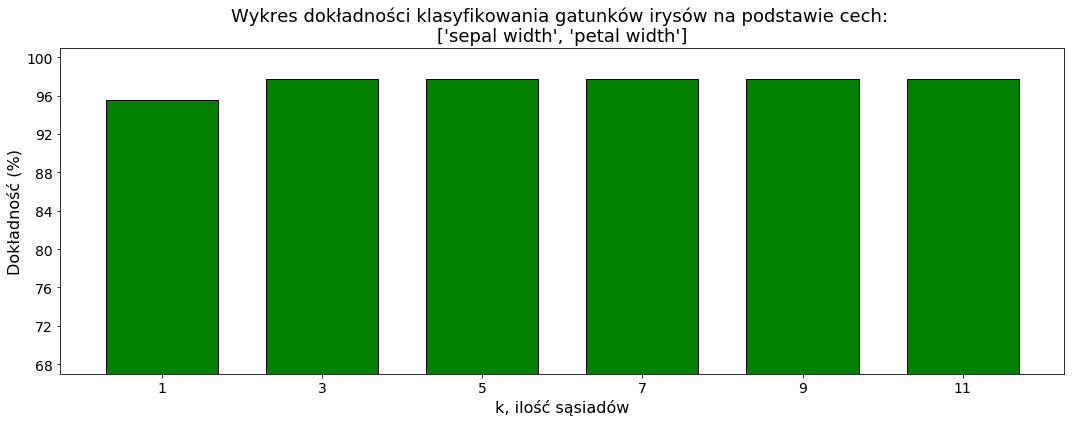

[71.11111111111111, 1, [0, 1, 2, 3]]


'\nbestTwo = [[0, 0, [0, 1, 2, 3]], [0, 0, [0, 1, 2, 3]]]\n\ndef bestTwoSwitcher(bestTwo, currentAccuracy, neighborsAmount, consideredValues):\n    for it in range(2):\n        if bestTwo[it][0] < currentAccuracy:\n            bestTwo[it] = [currentAccuracy, neighborsAmount, consideredValues]\n            return None\n        elif bestTwo[it][0] == currentAccuracy:\n            if bestTwo[it][1] > neighborsAmount:\n                bestTwo[it] = [currentAccuracy, neighborsAmount, consideredValues]\n                return None\n            elif bestTwo[it][1] == neighborsAmount or len(bestTwo[it][2]) > len(consideredValues):\n                bestTwo[it] = [currentAccuracy, neighborsAmount, consideredValues]\n                return None\n'

In [9]:
amountsOfNeighbors = [1, 3, 5, 7, 9, 11]
chosenValuesSets = [[0, 1, 2, 3], [0, 1, 2], [1, 2, 3], [0, 1], [1, 3]]
worstOne = [100, 1, [0, 1, 2, 3]]
expected = column2array(testData, 4)

def euklideanDistance(object1, object2, whichValues):
    distance = 0
    for val in whichValues:
        distance += pow(object1[val] - object2[val], 2)
    return distance

# k Nearest Neighbors
def kNN(trainingSet, testInstance, whichValues, k):
    distances = []
    for it in trainingSet:
        distances.append((it[4], euklideanDistance(it, testInstance, whichValues)))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for it in range(k):
        neighbors.append(distances[it])
    return neighbors

#for i in range(len(testData)):
#    print(kNN(trainingData, testData[i], [1, 2, 3], 3))

def classificate(kNN):
    classesAmounts = Counter(neighbor[0] for neighbor in kNN)
    if max(classesAmounts.items()) == 1:
        return kNN[0][0]    # w kNN sąsiedzi są ułożeni od najmniejszej odległości do największej
    else:
        return max(classesAmounts.items(), key=operator.itemgetter(1))[0]


def computeAccuracy(classified, expected):
    length = len(classified)
    missCount = 0
    for it in range(length):
        if classified[it] != expected[it]:
            missCount += 1
    return (length - missCount) / length


def worstOneSwitcher(worstOne, currentAccuracy, neighborsAmount):
    if worstOne[0] > currentAccuracy:
        worstOne = [currentAccuracy, neighborsAmount, [0, 1, 2, 3]]
    elif worstOne[0] == currentAccuracy and worstOne[1] < neighborsAmount:
        worstOne = [currentAccuracy, neighborsAmount, [0, 1, 2, 3]]
    return worstOne


def accuracyPlot(accuracyArray, values, bottomLine):
    plot.figure(figsize=(18,6))
    plot.bar(list(map(str, amountsOfNeighbors)), accuracyArray, color='g', edgecolor='black', width = 0.7)
    valuesNames = []
    for val in values:
        valuesNames.append(header[val])
    plot.title("Wykres dokładności klasyfikowania gatunków irysów na podstawie cech: \n" + str(valuesNames), fontsize = 18)
    plot.ylabel("Dokładność (%)", fontsize = 16)
    plot.xlabel("k, ilość sąsiadów", fontsize = 16)
    if bottomLine == None:
        tmp = int(min(accuracyArray) - 4)
        tmp2 = tmp + tmp % 2
    else:
        tmp = bottomLine
        tmp2 = bottomLine + bottomLine % 2
    plot.ylim([tmp,101]);
    plot.yticks(range(tmp2, 101, ((100 - (tmp2)) // 10) + 1 ), fontsize = 14)
    plot.xticks(fontsize = 14)
    
    plot.show()
   

accuracyArrays = []
for k in amountsOfNeighbors:
    classified = []
    for instance in testData:
        classified.append(classificate(kNN(trainingData, instance, chosenValuesSets[0], k)))
    currentAccuracy = computeAccuracy(classified, expected) * 100
    accuracyArrays.append(currentAccuracy)
print(accuracyArray)
accuracyPlot(accuracyArrays, chosenValuesSets[0], None)

accuracyArrays = []
bottomValue = 100

for values in chosenValuesSets[1:]:
    accuracyArray = []
    for k in amountsOfNeighbors:
        classified = []
        for instance in testData:
            classified.append(classificate(kNN(trainingData, instance, values, k)))
        currentAccuracy = computeAccuracy(classified, expected) * 100
        accuracyArray.append(currentAccuracy)
        worstOne = worstOneSwitcher(worstOne, currentAccuracy, k)
    if min(accuracyArray) < bottomValue:
        bottomValue = min(accuracyArray)
    accuracyArrays.append(accuracyArray)
    
bottomValue = int(bottomValue - 4)

for index, accArray in enumerate(accuracyArrays):
    print(accArray)
    accuracyPlot(accArray, chosenValuesSets[index + 1], bottomValue)
    

print(worstOne)
    

'''
bestTwo = [[0, 0, [0, 1, 2, 3]], [0, 0, [0, 1, 2, 3]]]

def bestTwoSwitcher(bestTwo, currentAccuracy, neighborsAmount, consideredValues):
    for it in range(2):
        if bestTwo[it][0] < currentAccuracy:
            bestTwo[it] = [currentAccuracy, neighborsAmount, consideredValues]
            return None
        elif bestTwo[it][0] == currentAccuracy:
            if bestTwo[it][1] > neighborsAmount:
                bestTwo[it] = [currentAccuracy, neighborsAmount, consideredValues]
                return None
            elif bestTwo[it][1] == neighborsAmount or len(bestTwo[it][2]) > len(consideredValues):
                bestTwo[it] = [currentAccuracy, neighborsAmount, consideredValues]
                return None
'''          

In [3]:
def computeAccuracySpecies(classified, expected):
    tmp = dict(Counter(expected))
    tmp2 = {**tmp.copy(), **dict(Counter(classified))}
    missesDictionary = tmp.copy()
    for key1 in list(tmp.keys()):
        missesDictionary[key1] = tmp2.copy()
        for key2 in list(tmp2.keys()):
            missesDictionary[key1][key2] = 0
    
    length = len(classified)
    for it in range(length):
        missesDictionary[expected[it]][classified[it]] += 1
    for key1 in list(tmp.keys()):
        for key2 in list(tmp2.keys()):
            missesDictionary[key1][key2] = 100 * (missesDictionary[key1][key2] / tmp[key1])
    
    return missesDictionary


classified = []
for instance in testData:
    classified.append(classificate(kNN(trainingData, instance, worstOne[2], worstOne[1])))
expected = column2array(testData, 4)
    
missesDictionary = computeAccuracySpecies(classified, expected)
t = PrettyTable(['Gatunek oczekiwany'] + list(missesDictionary.keys()))
for key in missesDictionary.keys():
    t.add_row([key] + list(item[1] for item in missesDictionary[key].items()))
t.title = "Macierz błędów dla " + str(worstOne[1]) + " sąsiadów i badanych wartości " + str(list(header[it] for it in worstOne[2]))

print (t)

'''
for best in bestTwo:
    classified = []
    for instance in testData:
        classified.append(classificate(kNN(trainingData, instance, best[2], best[1])))
    expected = column2array(testData, 4)
    
    missesDictionary = computeAccuracySpecies(classified, expected)
    t = PrettyTable(['Gatunek oczekiwany'] + list(missesDictionary.keys()))
    for key in missesDictionary.keys():
        t.add_row([key] + list(item[1] for item in missesDictionary[key].items()))
    t.title = "Macierz błędów dla " + str(best[1]) + " sąsiadów i badanych wartości " + str(list(header[it] for it in best[2]))

    print (t)
    
'''

+---------------------------------------------------------------------------------------------------------------+
| Macierz błędów dla 1 sąsiadów i badanych wartości ['sepal length', 'sepal width', 'petal length', 'petal width'] |
+---------------------------------+-------------+-------------------------------+-------------------------------+
|        Gatunek oczekiwany       |    setosa   |           versicolor          |           virginica           |
+---------------------------------+-------------+-------------------------------+-------------------------------+
|              setosa             |    100.0    |              0.0              |              0.0              |
|            versicolor           |     0.0     |       93.33333333333333       |       6.666666666666667       |
|            virginica            |     0.0     |              0.0              |             100.0             |
+---------------------------------+-------------+-------------------------------+----

'\nfor best in bestTwo:\n    classified = []\n    for instance in testData:\n        classified.append(classificate(kNN(trainingData, instance, best[2], best[1])))\n    expected = column2array(testData, 4)\n    \n    missesDictionary = computeAccuracySpecies(classified, expected)\n    t = PrettyTable([\'Gatunek oczekiwany\'] + list(missesDictionary.keys()))\n    for key in missesDictionary.keys():\n        t.add_row([key] + list(item[1] for item in missesDictionary[key].items()))\n    t.title = "Macierz błędów dla " + str(best[1]) + " sąsiadów i badanych wartości " + str(list(header[it] for it in best[2]))\n\n    print (t)\n    \n'